# Лабораторная работа № 1. Линейная регрессия

На основе набора данных об измерениях роста и веса решите следующую задачу.

Обучите модель линейной регрессии оценивать  вес человека. Для начала постройте одномерную модель, где в качестве единственного признака будет только вес, который человек сообщил о себе сам. Для обучения линейной модели используейте класс из библиотеки scikit-learn - [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Файл с данными - [Davis.csv](https://github.com/sdukshis/ml-intro/blob/master/datasets/Davis.csv)

Расширьте набор признаков добавив данные об измеренном и сообщенном весе, а также данные об поле человека.

Обратите внимание, что в некоторых строках встречаются пропуски. Это обычная ситуация при работе с реальными данными. Эти пропуски необходиму убрать из таблицы вместе со всей строкой. Это можно сделать с помощью метода [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [2]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt 

Populating the interactive namespace from numpy and matplotlib


In [3]:
ds = pd.read_csv('Davis.csv', index_col=0)
ds

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
198,M,81,175,NaN,NaN
199,M,90,181,91.0,178.0


In [4]:
from sklearn.linear_model import LinearRegression

## Задание

1. Обучите модель линейной регресси на данных, используя в качестве целевой переменной рост (height), а в качестве признака вес (weight).
2. Вычислите значение среднеквадратичной ошибки для построенной модели
3. Постройте прямую регресии и точки обучающей выборки
4. Расширьте пространство признаков, добавив туда пол и repwt.
5. Оцените как изменилась среднеквадратичная ошибка

In [6]:
#Load dataset
from sklearn.model_selection import train_test_split
x = pd.DataFrame(ds['weight'])
y = pd.DataFrame(ds['height'])
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25)



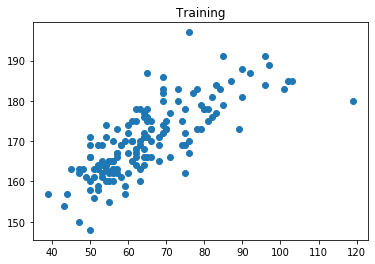

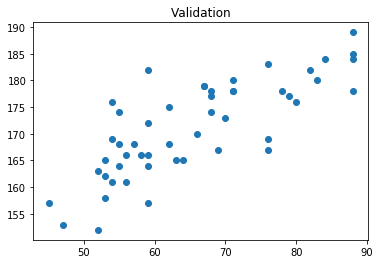

In [7]:
plt.scatter(x_train, y_train, label='Training')
plt.title('Training')
plt.show()
plt.scatter(x_valid, y_valid, label='Validation')
plt.title('Validation')
plt.show()



In [8]:
#Learning
reg = LinearRegression().fit(x_train, y_train)

In [9]:
#Coefficient of determination R^2
reg.score(x_train, y_train)

0.5920662844323221

In [10]:
#Coefficient of determination R^2of validation
reg.score(x_valid, y_valid)

0.594476800896125

In [11]:
#Get prediction
y_predict = reg.predict(x_valid)

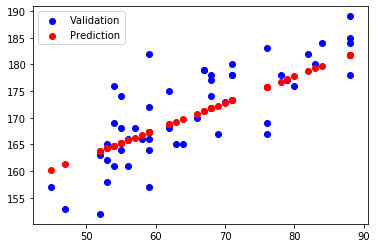

In [12]:
p1 = plt.scatter(x_valid, y_valid, c = 'blue')
p2 = plt.scatter(x_valid, y_predict, c = 'red')
plt.legend((p1, p2),("Validation", "Prediction"))
plt.show()

In [13]:
#Load dataset
from sklearn.model_selection import train_test_split
dataset = ds[['weight', 'sex', 'repwt', 'height']].dropna()
X = pd.DataFrame(dataset[['weight', 'sex', 'repwt']]) 
Y= pd.DataFrame(dataset['height'])
X['sex'] = X['sex'].map( {'F': 0, 'M': 1} ).astype(int)
X_train, X_valid, Y_train, Y_valid =  train_test_split(X, Y, test_size = 0.25)

In [14]:
X_train

,weight,sex,repwt
71,62,0,61.0
109,64,0,64.0
96,56,0,57.0
197,83,1,80.0
25,54,0,59.0
...,...,...,...
5,59,0,59.0
126,52,0,56.0
153,47,0,45.0
45,85,1,82.0


In [15]:
#Learning with more parameters
reg_for_more = LinearRegression().fit(X_train, Y_train)

In [16]:
#coefficient of determination R^2
reg_for_more.score(X_train, Y_train)

0.6742460386674769

In [17]:
#Coefficient of determination R^2 of validation
reg_for_more.score(X_valid, Y_valid)

0.6702004151549673

In [18]:
#Get prediction
Y_predict = reg_for_more.predict(X_valid)

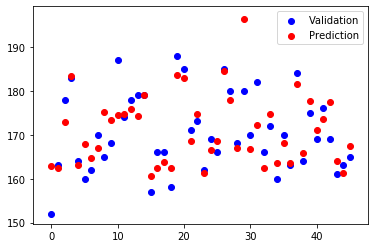

In [19]:
p1 = plt.scatter(np.arange(0,len(Y_valid)), Y_valid, c = 'blue')
p2 = plt.scatter(np.arange(0,len(Y_predict)), Y_predict, c = 'red')
plt.legend((p1, p2),("Validation", "Prediction"))
plt.show()

<h3>Вывод:</h3>
По значению коеффициента среднеквадратичной ошибки можно сказать, что добавление дополнительных признаков положительно повлияло на обучение нашей модели